# Computational Mechanics Sheet Q1

In [1]:
# Importing useful libraries, setting plot styles
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.rcParams['text.usetex'] = True # Plots have LaTeX
plt.style.use('seaborn-v0_8-whitegrid') # Plots look better (in my opinion)

For part A, I'm a little confused as to whether I could just use some inbuilt ODE solver from Scipy, so I think I'll just do a bit of both that and also writing my own solver.

In [2]:
# Part A
l = 0.1 # Length of string
g = 9.8 # Gravitational acceleration
omega2 = g/l # Square of SHM angular frequency
theta_0 = 30 * np.pi / 180 # Converted to radians

I think I will try a Verlet method. We have an ODE 
$$\ddot{\theta} = -\omega^2 \theta$$
with an initial condition $\theta(0) = \theta_0$, $\dot{\theta}(0) = 0$. For this method, we first define some time step $\Delta t$, and a number $N$ of these time steps over which the process is evaluated. For this question, we require $N \Delta t = 20$s. 

Firstly, for convenience in following formulae, we denote $\theta(i \Delta t) \equiv \theta_i$.
We then compute $\theta_1 = \theta_0 - \frac{1}{2}\omega^2 \sin \theta_0 (\Delta t)^2$.

In [3]:
N = 100000 # Number of times iterated over
t = np.linspace(0, 20, N) # Vector of time values at which theta is evaluated
delta_t = t[1] - t[0] # time interval - constant over time vector
theta = np.zeros(N) # empty vector of theta

# 1st, second values of theta
theta[0] = theta_0
theta[1] = theta[0] - omega2 * np.sin(theta[0]) * (delta_t ** 2) / 2

For $i = 1, \dots, N - 1$, compute:
$$\theta_{i+1} = 2 \theta_i - \theta_{i-1} - \omega^2 \sin \theta_i (\Delta t)^2$$

In [4]:
# Iterate over all subsequent times
for i in range(1, N - 1):
    theta[i + 1] = 2 * theta[i] - theta[i - 1] - omega2 * np.sin(theta[i]) * (delta_t ** 2)

We can now plot this, and compare it to the small angle approximated $\theta(t) = \theta_0 \cos \omega t$.

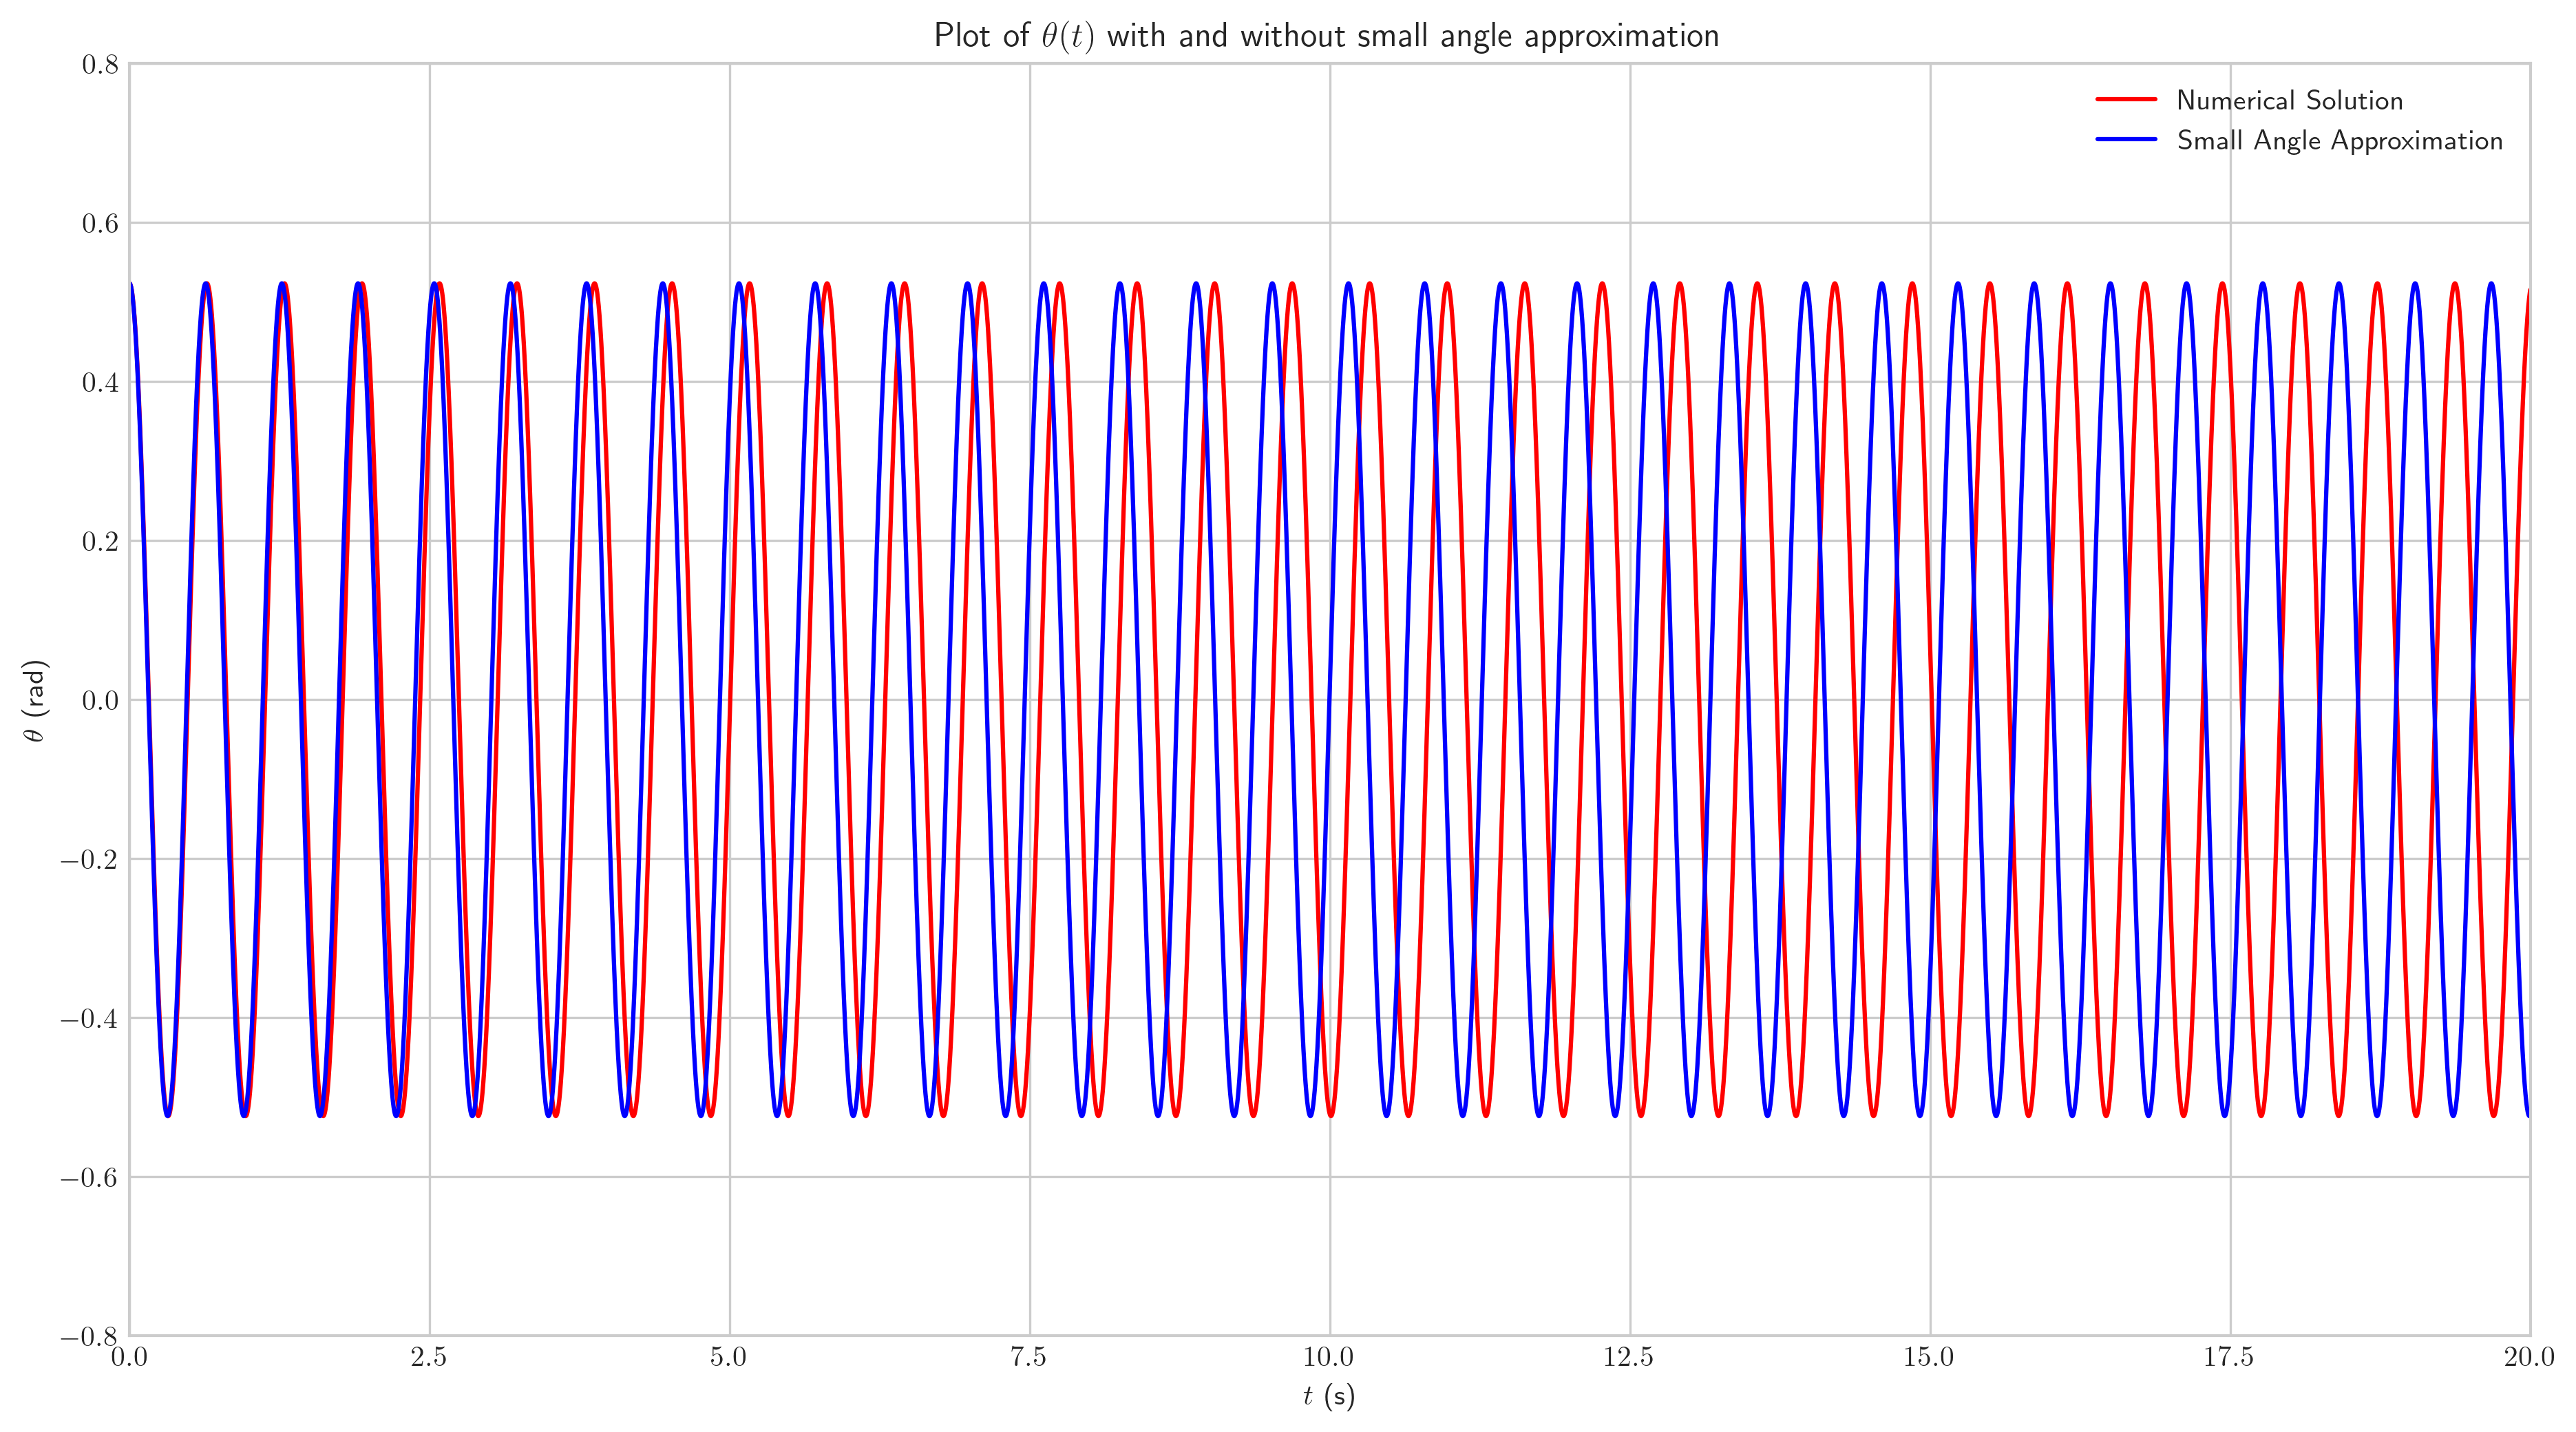

In [5]:
# Setting a couple of plot parameters
plt.figure(figsize=(15, 8), dpi=300)
plt.xlim(0, 20)
plt.xlabel('$t$ (s)')
plt.ylim(-0.8, 0.8)
plt.ylabel('$\\theta$ (rad)')
plt.title('Plot of $\\theta(t)$ with and without small angle approximation')


plt.plot(t, theta, label='Numerical Solution', color='r') # Plot of numerical solution
plt.plot(t, theta_0 * np.cos(np.sqrt(omega2) * t), label='Small Angle Approximation', color='b') # SHM solution
plt.legend() 
plt.show()

The curves are clearly not identical, they seem to diverge from one another as time increases. It might also be worth checking my numerical simulation alongside that predicted by Scipy's built in ODE solver. We must initially reduce the order of the ODE by casting it as a system of two first order ODEs, introducing a new variable $\psi$.

$$\dot{\psi} = - \omega^2 \theta$$
$$\dot{\theta} = \psi$$

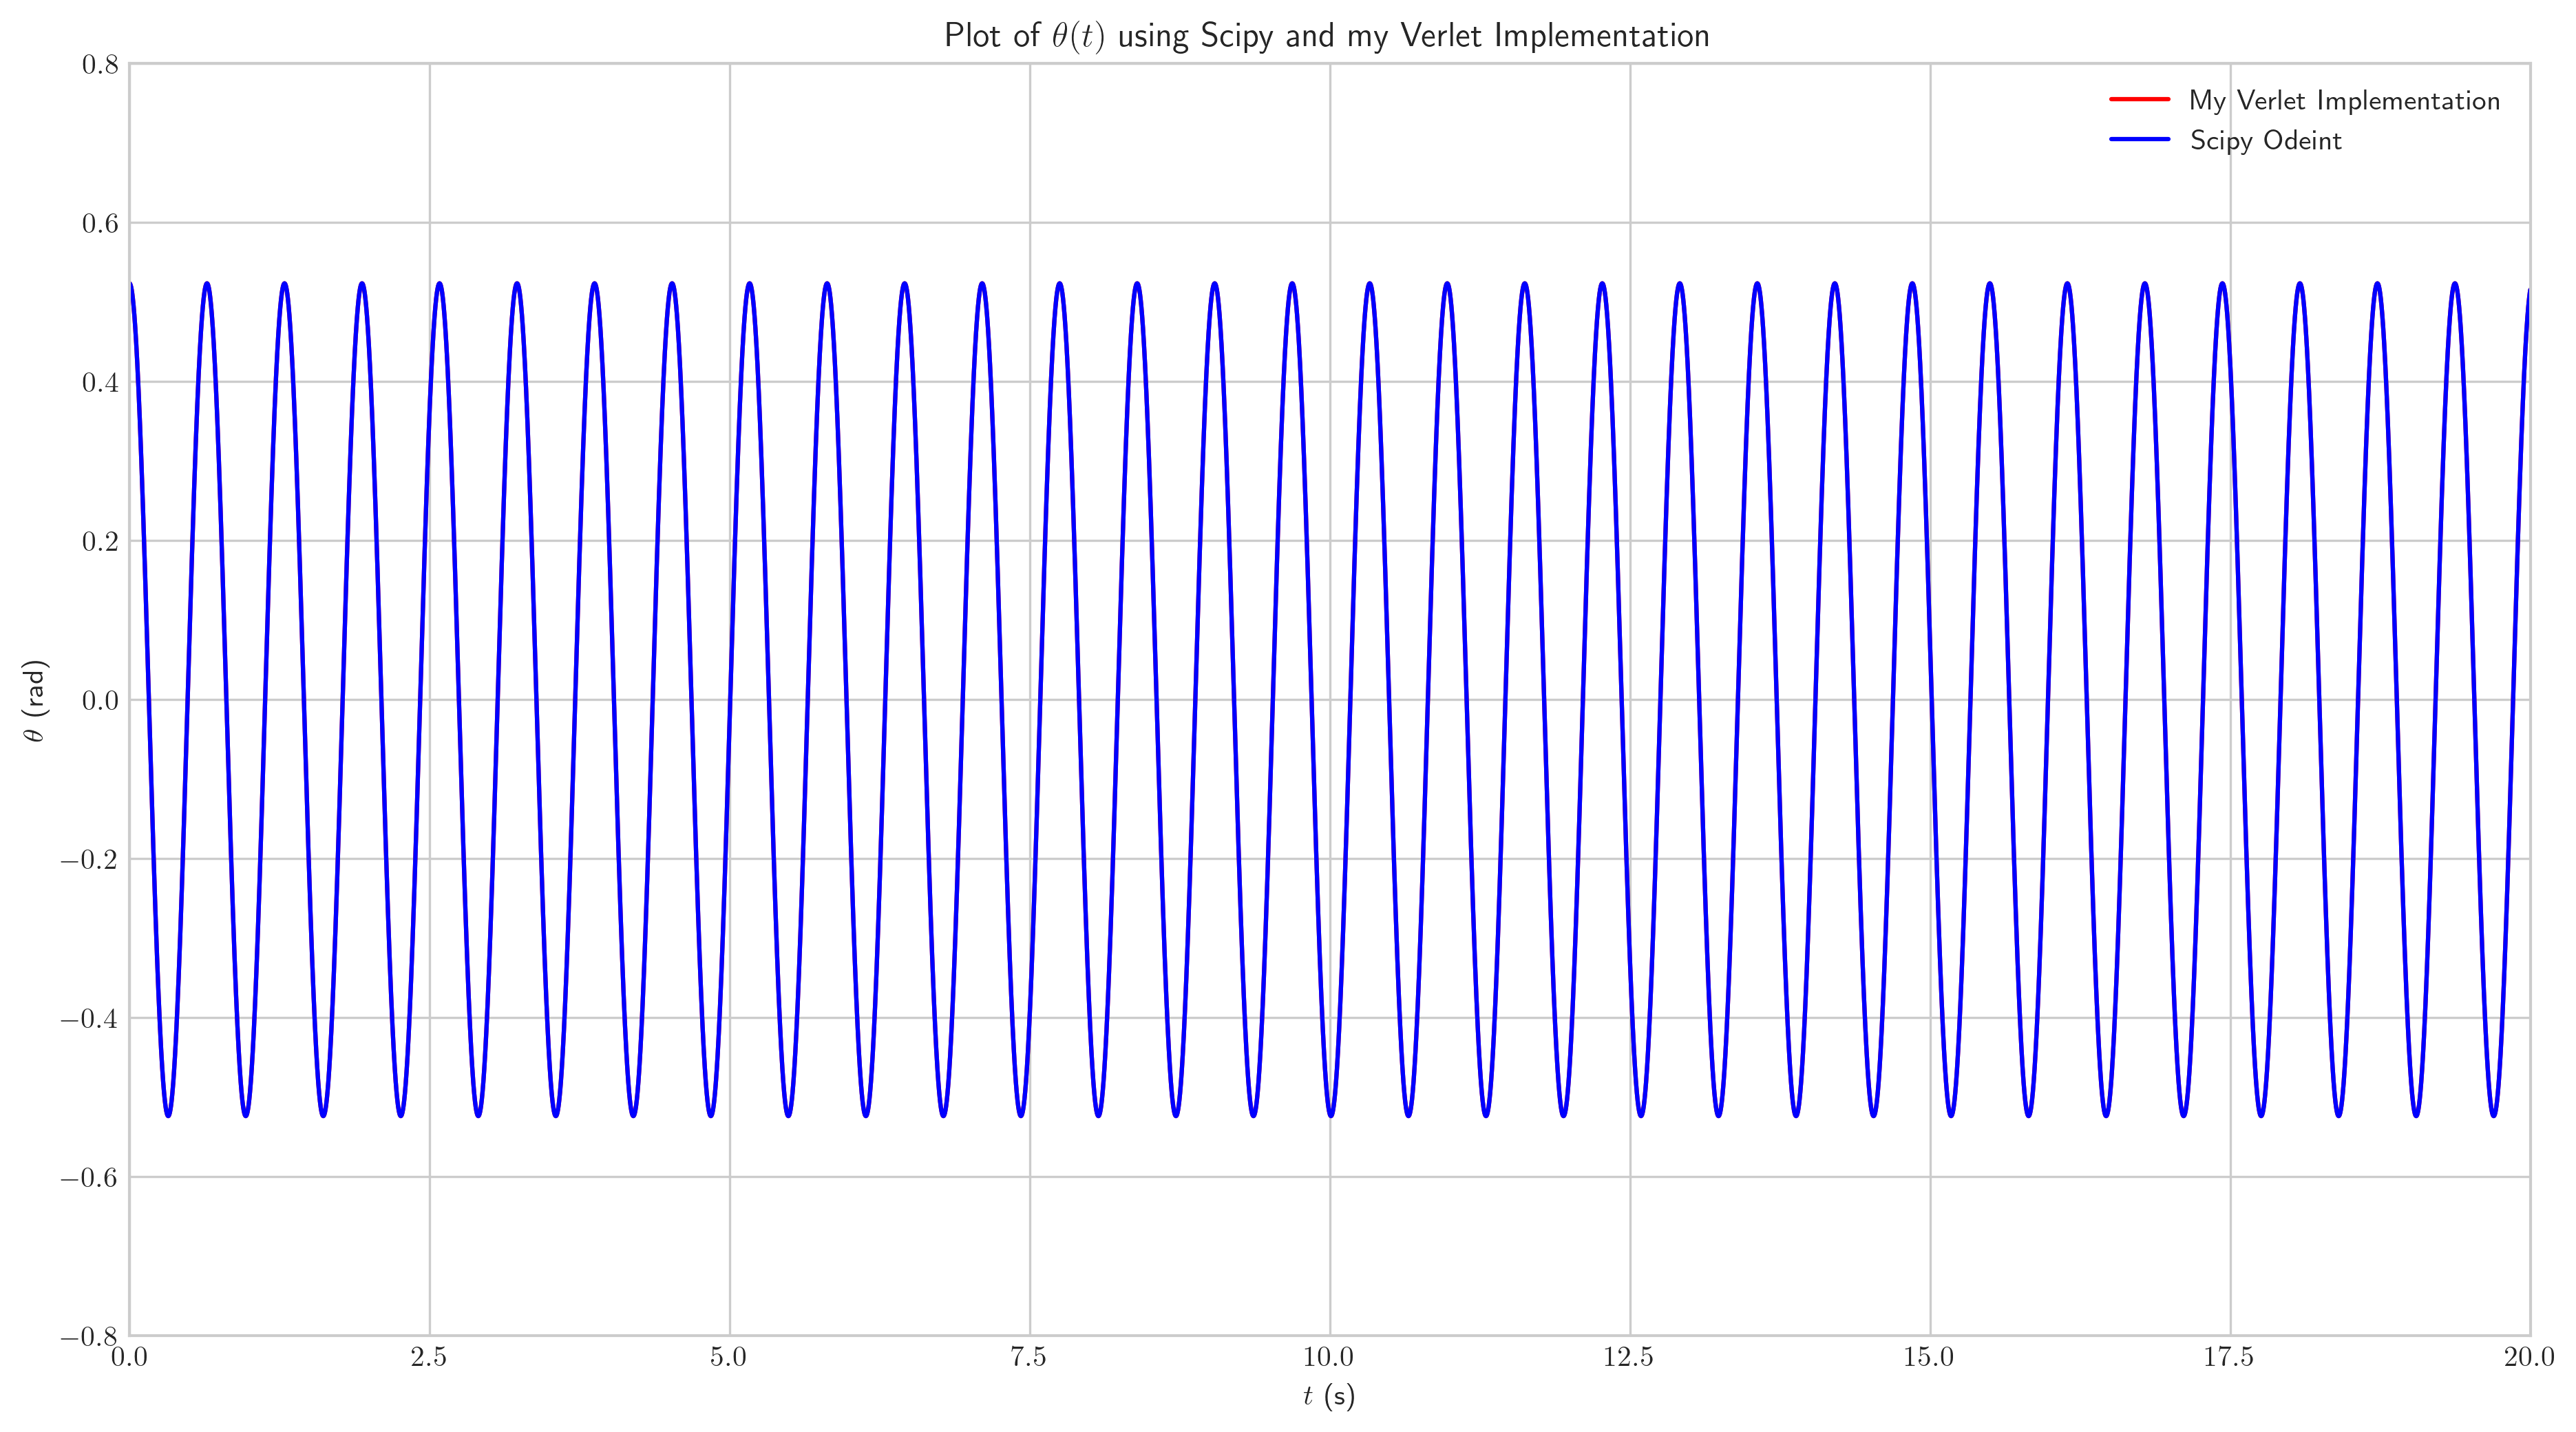

In [6]:
# Defining the differential function for the system described above
def pend(y, t, omega2):
    theta, psi = y
    dydt = [psi, -omega2 * np.sin(theta)]
    return dydt

y0 = [30 * np.pi / 180, 0] # Initial conditions
sol = odeint(pend, y0, t, args=(omega2, )) # Calling the scipy ODE solver

# Setting a couple of plot parameters
plt.figure(figsize=(15, 8), dpi=300)
plt.xlim(0, 20)
plt.xlabel('$t$ (s)')
plt.ylim(-0.8, 0.8)
plt.ylabel('$\\theta$ (rad)')
plt.title('Plot of $\\theta(t)$ using Scipy and my Verlet Implementation')

plt.plot(t, theta, label='My Verlet Implementation', color='r')
plt.plot(t, sol[:, 0], color='b', label='Scipy Odeint')
#plt.plot(t, theta_0 * np.cos(np.sqrt(omega2) * t), label='Small Angle Approximation', color='k')
plt.legend()
plt.show()

It seems my Verlet integrated solution is almost exactly the same as the one generated by Scipy, so that's good I suppose.

Observing the earlier plot further would should that the blue line - corresponding to the SHO approximation - oscillates at a higher frequency. The Taylor expansion for $\sin \theta$ is $\sin \theta \approx \theta - \frac{\theta^3}{3} + O(\theta^5)$, so for values of $\theta$ such as those in this question, we have the $O(\theta^5)$ terms approximately negligible. Then, we have $\sin \theta \approx \theta - \frac{\theta^3}{3} <  \theta$. Hence, the restoring acceleration ($\alpha \sin \theta$) is larger in the SHO case than otherwise, so the frequency of oscillation is also larger. 

We can now plot $\theta(t) + \theta_{SHO}(t)$ to attempt to find a phase relation. In retrospect, we can also add a nice vertical line to label where the antiphase seems to occur.

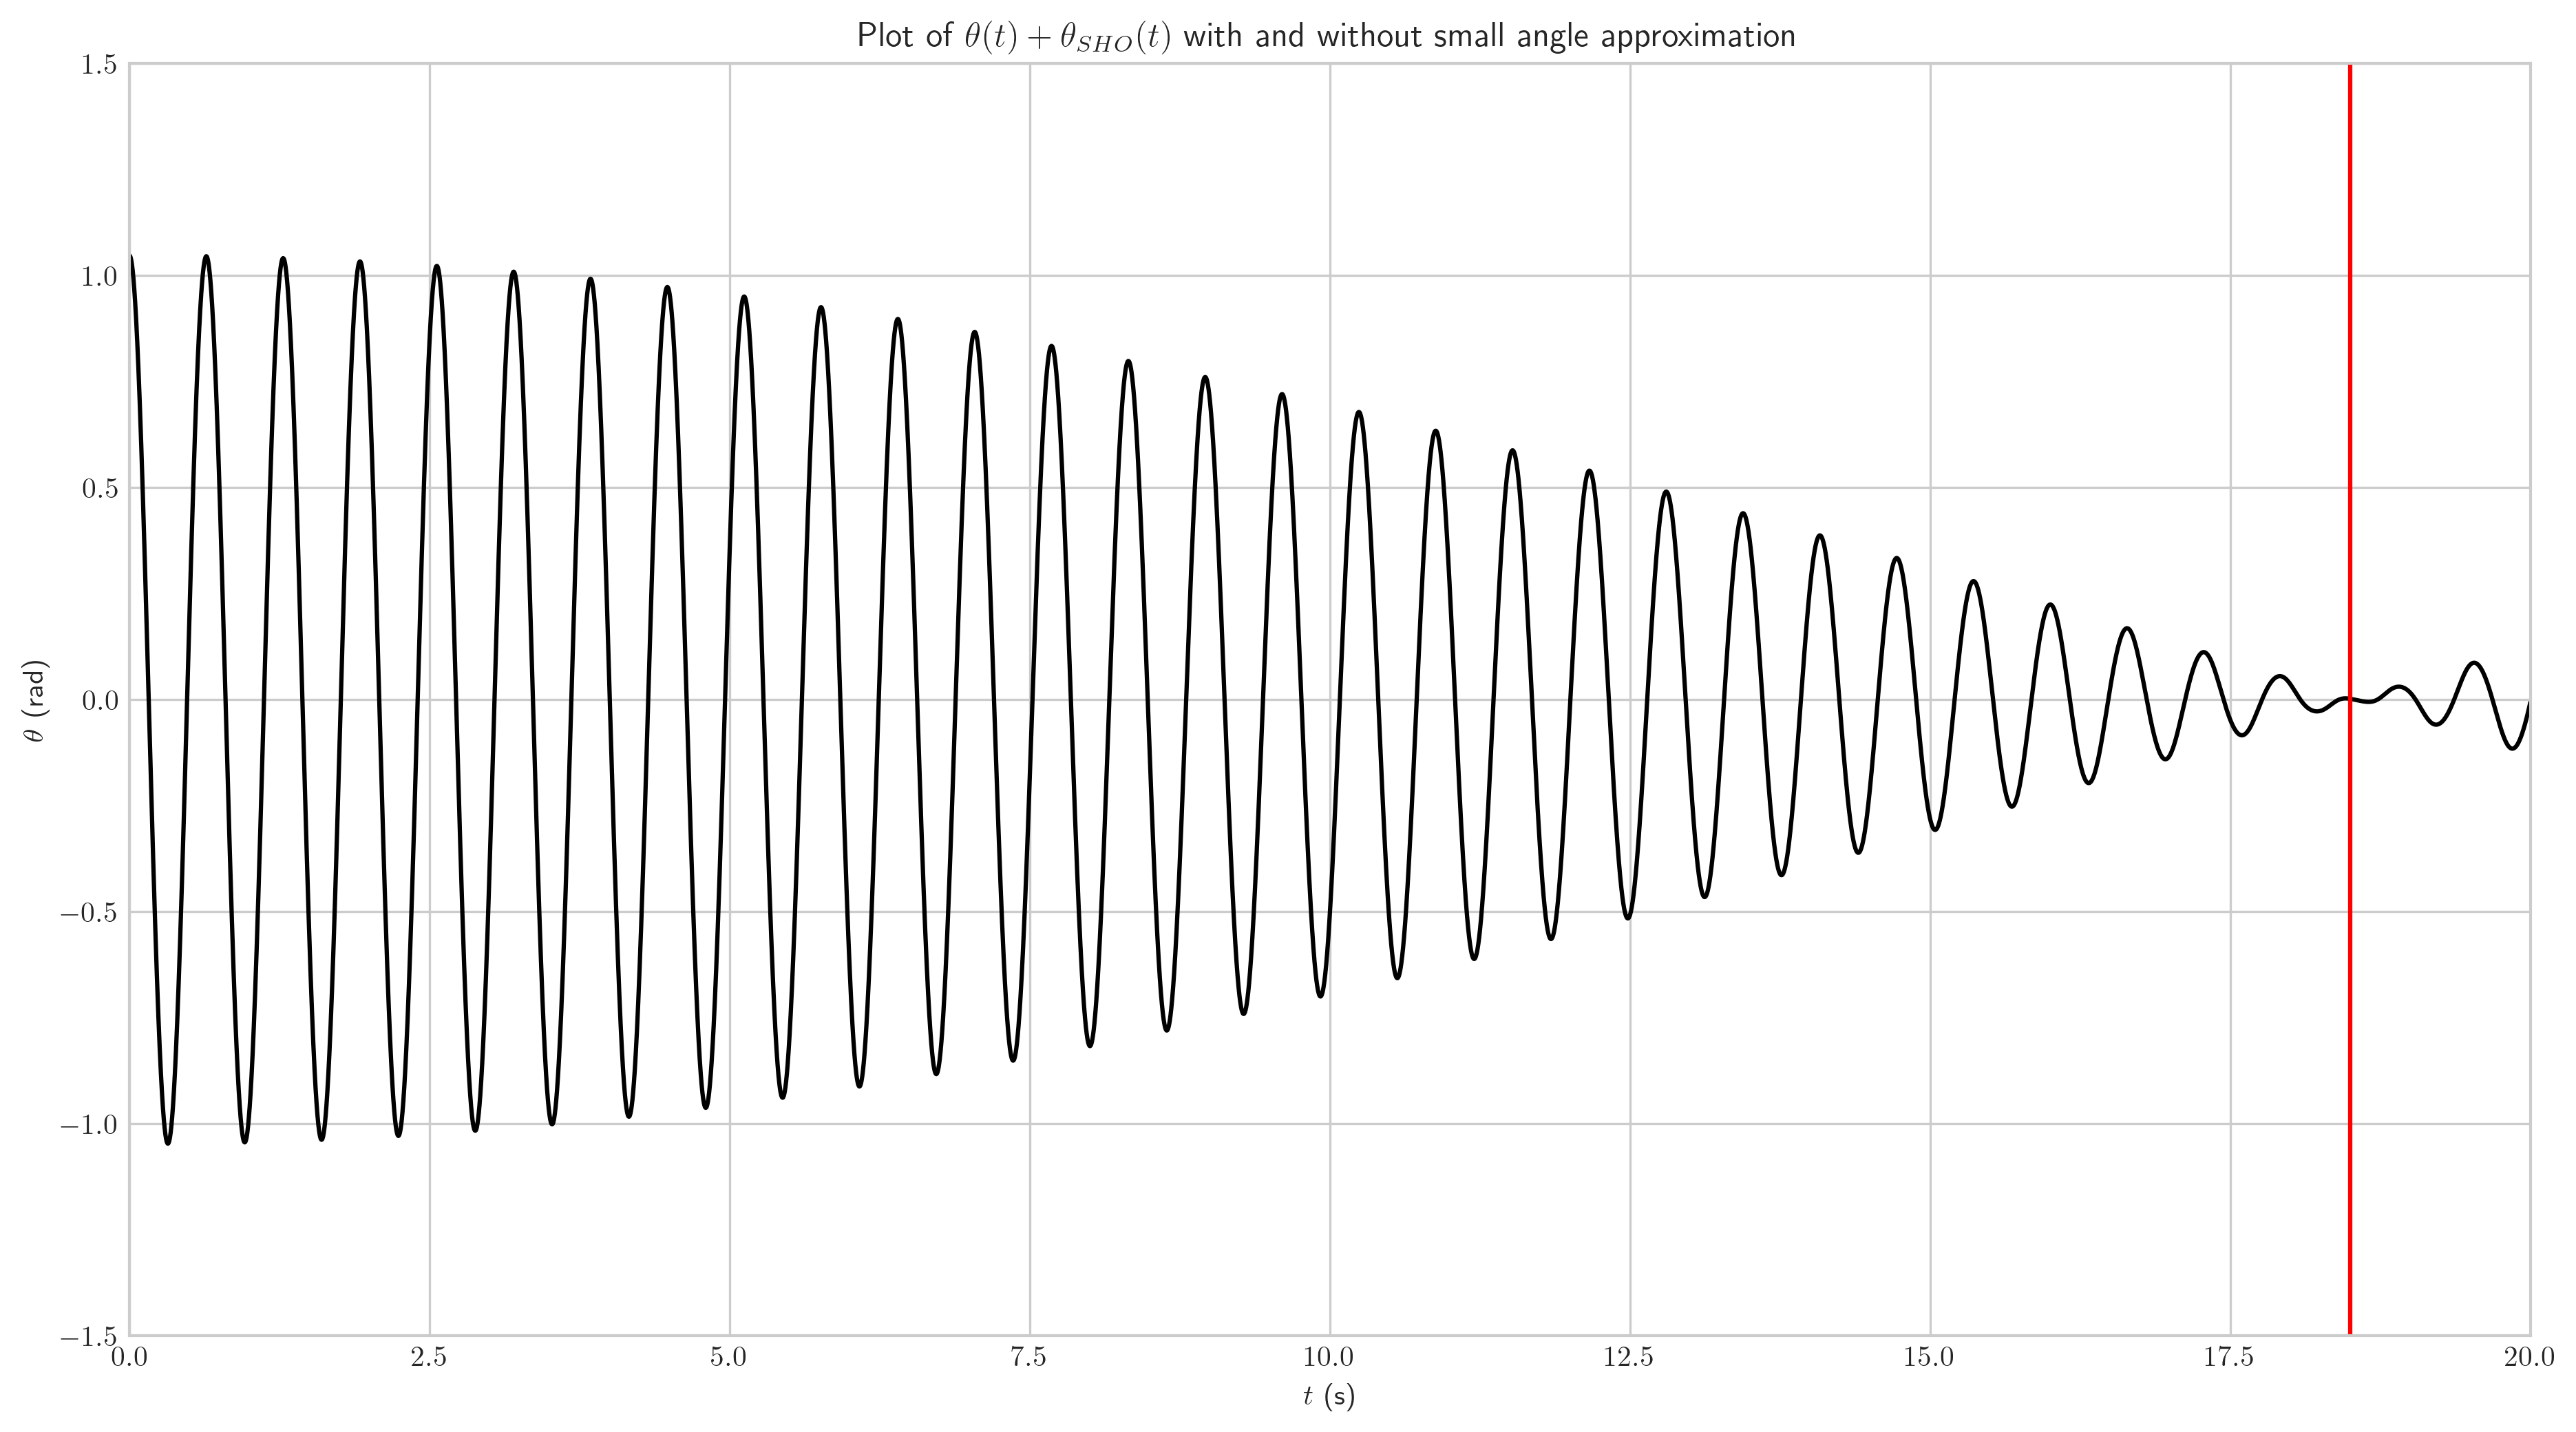

In [7]:
# Setting a couple of plot parameters
plt.figure(figsize=(15, 8), dpi=300)
plt.xlim(0, 20)
plt.xlabel('$t$ (s)')
plt.ylim(-1.5, 1.5)
plt.ylabel('$\\theta$ (rad)')
plt.title('Plot of $\\theta(t) + \\theta_{SHO}(t)$ with and without small angle approximation')

plt.plot(t, theta + theta_0 * np.cos(np.sqrt(omega2) * t), color='k')
plt.plot([18.5, 18.5], [2, -2], color='r') # Plotting vertical line at t=18.5s
plt.show()

In the above, we can see the amplitude of the superposed wave is approximately zero at $t \approx 18.5$s, which corresponds to the antiphase of the SHO and Verlet waves. Then, if a time of $18.5$s corresponds to a phase difference of $\pi$, a time of $24$h corresponds to a phase difference $\Delta \varphi$ of:


We require $\omega_1$ to have dimensions $T^{-1}$, and we also know that the system (represented by the initial ODE) can be described entirely in terms of variables $\theta, t, \omega, \theta_0$.

The time period cannot really by definition depend on the position of the pendulum since it encapsulates the entire oscillation, and hence all positions of the bob. This rules out $\theta$ dependence.

We expect the behaviour of the system to be the same if we (only) start the oscillation at some later time, so that rules out $t$ dependence. 

To provide the dimension of $T^{-1}$, we realise that $\omega_1 = \alpha \omega$, where $\alpha$ is some dimensionless constant. $\alpha$ may depend on the initial angular displacement $\theta_0$, so we write $\alpha \equiv F(\theta_0)$, finally giving:

$$ \omega_1 = F(\theta_0) \omega$$

We will now suppose 
$$F(\theta_0) = a_0 + a_1 \theta_0 + a_2 \theta_0^2 +\cdots$$
In the limit $\theta_0 \rightarrow 0$ we expect $\omega_1 \rightarrow 0$, ie we expect purely SHM behaviour in this limit. This would imply that $a_0 = 0$ (in disagreement with the sheet...). Next, we note that the simple pendulum is symmetric about the line $\theta = 0$, which means we expect pendula released at some $\pm \theta_0$ to have the same angular frequency, which then implies $F(\theta_0)$ is an even function. So, all coefficients $a_i$ with odd $i$ must be $0$. As mentioned above, the numerical solution seemed to have a lower frequency than that predicted for SHM. For this $\theta_0$, $\omega_1 < 0$, which implies the next leading term in the expansion of $F(\theta_0) < 0$, so $a_2 < 0$.

We can write:
$$\cos [(\omega + \omega_1)t] + \cos (\omega t) = 2 \cos \left( \frac{\omega_1 t}{2} \right)\cos \left[\left( \omega + \frac{\omega_1}{2}\right)t\right]$$
Which implies the oscillation shown in the superposition graph is like a cosine of angular frequency $\omega + \omega_1 / 2$ with its amplitude modulated (?) by a cosine envelope of angular frequency $\omega_1 / 2$. Then, the red line in the figure corresponds to this $\cos (\omega_1 t / 2) = 0$, and noting that \omega_1 < 0, we can say:
$$\frac{\omega_1 \times 18.5}{2} \approx -\frac{\pi}{2} \quad \Rightarrow \quad \omega_1 \approx -\frac{\pi}{18.5}$$
Now introducing the expression for $F(\theta_0)$:
$$\frac{\omega_1}{\omega} = F\left(\frac{\pi}{6}\right) \approx a_2 \left(\frac{\pi}{6}\right)^2 \approx -\frac{\pi}{18.5 \omega} $$
$$a_2 \approx -\frac{36}{18.5 \pi \omega}$$
I will use Python to calculate this - my calculator is broken.

In [8]:
print('Calculated value is: ', -36 / (18.5 * np.sqrt(omega2) * np.pi))
print('Value of 1/16 is: ', -1/16)

Calculated value is:  -0.06257024591053247
Value of 1/16 is:  -0.0625


Hence, we can see $a_2 \approx -1/16$. Recalling question 7c from problem sheet 3, we had the formula for the time period:
$$T \approx T_{SHO}\left(1 + \frac{\sin^2(\theta_0/2)}{4}\right)$$
So, changing to angular frequency:
$$\omega \approx \frac{\omega_{SHO}}{1 + \frac{\sin^2(\theta_0/2)}{4}}$$
Taking the $\sin$ term to be small, I apply a first order binomial approximation:
$$\omega \approx \omega_{SHO} \left(1 - \frac{\sin^2(\theta_0/2)}{4}\right)$$
Then, apply $\sin x \approx x$:
$$\omega \approx \omega_{SHO} \left(1 - \frac{(\theta_0/2)^2}{4}\right) = \omega_{SHO} \left(1 - \frac{\theta_0^2}{16}\right)$$
So,
$$\omega_1 = \omega - \omega_{SHO} \approx -\frac{\theta_0^2}{16} \, \omega_{SHO} \quad \Rightarrow \quad a_2 \approx -\frac{1}{16}$$
So, the results seem to be in agreement.